In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

In [3]:
train_data.shape

(10683, 11)

In [4]:
test_data.shape

(2671, 10)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#combining train and test dataset.
df = train_data.append(test_data)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [9]:
# df['Date_of_Journey'].str.split('/').str[0].astype(int)

#### As all the columns are of categorical type. Each columns should be handled one by one
##### handling Date_of_Journey column

In [10]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [13]:
#changing the dtypes of Day, Month and Year columns to int32
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

#dropping Date_of_Journey columns
df.drop(['Date_of_Journey'],axis = 1,inplace=True)

In [14]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
dtype: object

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


##### handling Arrival_Time column

In [16]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)

df.drop(['Arrival_Time'],axis = 1,inplace = True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [20]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Min          int32
dtype: object

##### handling Total_Stops column.

In [21]:
df['Total_Stops'].isnull().sum()

1

In [22]:
#this is the record which has null value
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480.0,6,5,2019,9,25


In [23]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

##### replacing nan value by '1 stop'

In [24]:
df['Total_Stops'].fillna('1 stop',inplace = True)

In [25]:
#fixed the missing values
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min


In [26]:
# replacing 'non-stop' with '0 stops' 
df['Total_Stops'].replace('non-stop','0 stops',inplace=True)

In [27]:
df['Total_Stops'].unique()

array(['0 stops', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [28]:
#only keeping numbers.
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]

In [29]:
#converting to dtype to int
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [30]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [31]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


##### handling Dep_Time

In [32]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype(int)

df.drop(['Dep_Time'],axis = 1,inplace = True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


##### Handling Route column

In [34]:
df['Route_1'] = df['Route'].str.split('→ ').str[0]
df['Route_2'] = df['Route'].str.split('→ ').str[1]
df['Route_3'] = df['Route'].str.split('→ ').str[2]
df['Route_4'] = df['Route'].str.split('→ ').str[3]
df['Route_5'] = df['Route'].str.split('→ ').str[4]

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [36]:
##fixing the nan values in newly create Route_1,2,3,4,5 columns
df['Route_1'].fillna('None',inplace = True)
df['Route_2'].fillna('None',inplace = True)
df['Route_3'].fillna('None',inplace = True)
df['Route_4'].fillna('None',inplace = True)
df['Route_5'].fillna('None',inplace = True)

In [37]:
#droping Route
df.drop(['Route'],axis = 1,inplace = True)

In [38]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Min           0
Dep_Hour              0
Dep_Min               0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

* as we can see there are 2671 missing values in price column. This is beacuse we have merged test and train dataset and in test dataset there is not price column.
* we don't need to handle this as we will again be splitting it into train and test data

In [39]:
#droping Duration column as we have already handled arrival and departure time.
#Duration is diff btw arrival and departure time
df.drop(['Duration'],axis = 1, inplace = True)

In [40]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int32
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Min          int32
Dep_Hour             int32
Dep_Min              int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
dtype: object

In [41]:
#these are the columns that should be encoded(either label or one hot)
enc_columns =[]
for column in df.columns:
    if(df[column].dtype == 'object'):
        enc_columns.append(column)
print(enc_columns)

['Airline', 'Source', 'Destination', 'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


##### label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [43]:
for column in enc_columns:
    df[column] = encoder.fit_transform(df[column])

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4


In [45]:
df.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops          int32
Additional_Info      int32
Price              float64
Day                  int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Min          int32
Dep_Hour             int32
Dep_Min              int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
dtype: object

#### Separating train and test value again

In [46]:
train_data = df.iloc[:10683,:]
test_data = df.iloc[10683:,:]

In [47]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4


In [48]:
#seperating x and y from train data
X = train_data.drop(['Price'],axis = 1)
y = train_data['Price']

In [49]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,1,8,NaN,6,6,2019,4,25,17,30,3,7,6,12,4
1,3,3,0,1,8,NaN,12,5,2019,10,20,6,20,2,33,3,12,4
2,4,2,1,1,5,NaN,21,5,2019,19,0,19,15,3,7,6,12,4
3,6,2,1,1,8,NaN,21,5,2019,21,0,8,0,3,7,6,12,4
4,0,0,2,0,8,NaN,24,6,2019,2,45,23,55,0,13,24,12,4


In [50]:
#this is our unseen test data
test_data.drop(['Price'],axis = 1,inplace = True)

C:\Users\vinay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Feature selection

In [51]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [53]:
model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [54]:
#it will tell which column in not required
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [55]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour',
       'Dep_Min', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [56]:
X['Year'].unique()

array([2019])

As we can see only 1 value is there in entire column,hence can be removed.

In [57]:
X.drop(['Year'],axis = 1,inplace =True)

In [58]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,24,3,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,1,5,13,15,5,50,2,25,1,3,4
2,4,2,1,2,8,9,6,4,25,9,25,3,32,4,5,4
3,3,3,0,1,8,12,5,23,30,18,5,2,34,3,12,4
4,3,0,5,1,8,1,3,21,35,16,50,0,34,8,12,4


#### Splitting into train and test

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

### RandomForestRegressor with hyperparameter tuning

In [61]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [62]:
# Create the param_distributions
param_distributions = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
              }

print(param_distributions)

{'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30]}


In [63]:
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [64]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_distributions,cv=5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=181, max_features=sqrt, max_depth=25 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=181, max_features=sqrt, max_depth=25, total=   2.6s
[CV] n_estimators=181, max_features=sqrt, max_depth=25 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=181, max_features=sqrt, max_depth=25, total=   2.4s
[CV] n_estimators=181, max_features=sqrt, max_depth=25 ...............
[CV]  n_estimators=181, max_features=sqrt, max_depth=25, total=   2.3s
[CV] n_estimators=181, max_features=sqrt, max_depth=25 ...............
[CV]  n_estimators=181, max_features=sqrt, max_depth=25, total=   2.4s
[CV] n_estimators=181, max_features=sqrt, max_depth=25 ...............
[CV]  n_estimators=181, max_features=sqrt, max_depth=25, total=   2.6s
[CV] n_estimators=163, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=163, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=163, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=163, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=163, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=163, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=163, max_features=sqrt, max_depth=5 ................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [66]:
y_pred=rf_random.predict(X_test)

Hurray finally done with feature engineering part

In [67]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=109, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
rf_random.best_score_

0.8944280182730522

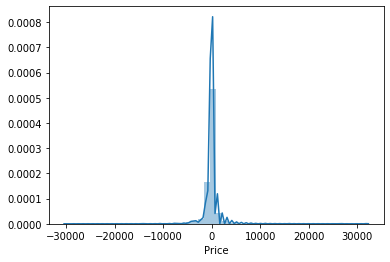

In [69]:
import seaborn as sns

sns.distplot(y_test-y_pred)

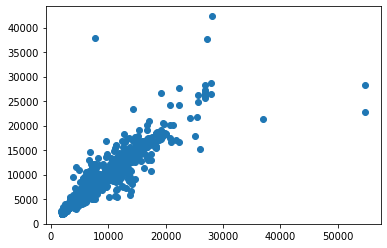

In [70]:
plt.scatter(y_test,y_pred)

#### Prediction on test data

In [72]:
test_data.drop(['Year'],axis = 1,inplace =True)

C:\Users\vinay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
predictions = rf_random.predict(test_data)

In [74]:
predictions

array([14714.        ,  4235.66055046, 12891.95412844, ...,
       15771.18348624, 15581.37614679,  7353.81651376])